# ANÁLISIS POPULARIDAD TEMPORAL DE LOS SHOW

### Autor:Pedro Jofre
### Curso:Data Science II: Machine Learning para la Ciencia de Datos
### comision: 61190

## The Movie Database

El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 


source:https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download.



## Hipotesis: 
En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

En primer lugar se carga las librerias necesarias y la base previamente descargada.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator
import seaborn as sns


In [23]:
table= pd.read_csv('TMDB_tv_dataset_v3.csv')
table.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [24]:
table.shape

(168639, 29)

In [25]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

A continuacion revisamos los faltantes de la base

<Axes: >

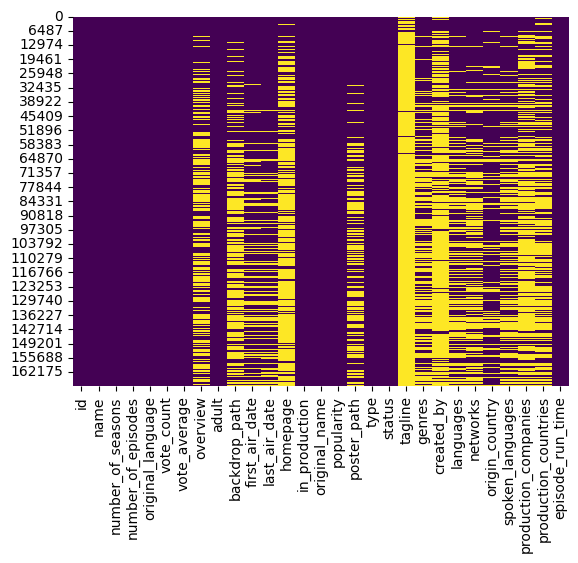

In [26]:
sns.heatmap(table.isnull(),cmap='viridis',cbar=False)

In [27]:
(table.isnull().sum()).sum()

1190189

Como se puede observar los datos poseen una gran cantidad de datos faltantes. Por lo que en primer lugar se una limpieza de datos, a continuacion se dara un resumen de los puntos mas importantes, se puede observar todos los pasos tomados en la transformacion en el notebook "data_wrapping Jofre.ipynb".<br> Para facilitar la visualizacion de la data es necesario renombrar las variables a traves de la funcion rename. 

In [28]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"#_Temporadas",
'number_of_episodes':"#_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

table.rename(columns=nombres_columnas,inplace=True)

- En primer lugar se eliminaran los 5 registros que no poseen nombre, ya que corresponden a un porcentaje menor del 0.01% 
- Se eliminan los campos que no entregan mayor informacion relevante para el analisis propuesto como:Resumen,url_Imagen,Pagina,url_Poster,Frase
- Se elimina las filas que no poseen fecha de inicio o fin 
- Se rellena la informacion faltante en los campos 'Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion' como 'sin informacion'

In [29]:
table=table.dropna(subset=['Nombre_Serie'])
table=table.drop(columns=['Resumen','url_Imagen','url_Poster','Frase','Pagina'])
table=table.dropna(subset=['Fecha_Inicio','Fecha_Fin' ])
columnas= ['Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion']
for c in columnas:
    table[c]=table[c].fillna('sin informacion')

In [31]:
table.shape

(135806, 24)

Se puede observar que luego de los cambios se mantiene sobre un 80% de los datos originales

A continuacion se realiza el proceso de enriquecimiento, donde generaremos nuevos campos a partir de la informacion recolectada para la calidad de nuestra base, al igual que el tratamiento de nulos si quiere revisar en detalles todos los pasos los puede observar en el notebook "data_wrapping Jofre.ipynb". Para dar un resumen los procesos realizados fueron los siguientes:<br>
1- para cada columna que consiste en un array de string se crea un nuevo campo que muestre cuantos datos existen en la columna, como por ejemplo generos.<br>
2- se crea nuevas columnas relacionada a la fecha, como año, mes y estacion.<br>
3- Se crean bases de datos auxiliares de los campos trabajados en el punto 1 utilizando el id del show como llave foreana. <br>
4- se eliminan las columnas del punto 1 y se guarda la nueva base base transformada.

Los pasos anteriores dan como resultados una base de datos con esquema de estrella, con la tabla de hechos siendo "TMDB_procesado.csv" y 8 tablas de dimensiones, las cuales muestran informacion adicional para cada show.

In [32]:
tmdb=pd.read_csv('TMDB_procesado.csv')
tmdb.head()

,Nombre_Serie,#_Temporadas,#_Episodios,Idioma_original,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,En_Produccion,...,num_Companias_Produccion,num_Paises_Produccion,Mes_I,estacion_I,estacion_I_n,anho_I,Mes_F,estacion_F,estacion_F_n,anho_F
0,Game of Thrones,8,73,en,21857,8.442,False,2011-04-17,2019-05-19,False,...,4,2,4,0,primavera,2011,5,1,verano,2019
1,Money Heist,3,41,es,17836,8.257,False,2017-05-02,2021-12-03,False,...,1,1,5,1,verano,2017,12,0,primavera,2021
2,Stranger Things,4,34,en,16161,8.624,False,2016-07-15,2022-07-01,True,...,2,1,7,3,invierno,2016,7,3,invierno,2022
3,The Walking Dead,11,177,en,15432,8.121,False,2010-10-31,2022-11-20,False,...,6,1,10,2,otoño,2010,11,3,invierno,2022
4,Lucifer,6,93,en,13870,8.486,False,2016-01-25,2021-09-10,False,...,4,1,1,1,verano,2016,9,1,verano,2021
